In [147]:
import warnings
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_openml,load_iris,fetch_california_housing
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import (
RepeatedStratifiedKFold, 
cross_val_score, 
train_test_split, 
GridSearchCV,
cross_val_predict, 
learning_curve, 
validation_curve)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error,zero_one_loss, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from os.path import join as pjoin
#sharper plots
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from PIL import Image
import random
warnings.filterwarnings("ignore")
from shutil import copyfile
from sklearn.svm import SVC
import openpyxl

In [148]:
#data_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_test.csv"
test_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_test.csv"
train_path = r"C:\Users\Acer\Desktop\spbu_ml_2025\data\prices_train.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_test.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df_train.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

df_train_0 = df_train.copy()
df_test_0 = df_test.copy()

df_test


,index,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0,2012.833,3.4,NaN,NaN,24.95744,121.53711
1,1,2013.083,34.8,405.21340,1.0,24.97349,121.53372
2,2,2013.500,4.1,2147.37600,3.0,24.96299,121.51284
3,3,2012.917,18.9,1009.23500,0.0,24.96357,121.54951
4,4,2013.417,3.9,2147.37600,3.0,24.96299,121.51284
...,...,...,...,...,...,...,...
78,78,2013.167,21.3,537.79710,4.0,24.97425,121.53814
79,79,2012.917,9.9,279.17260,NaN,24.97528,121.54541
80,80,2013.417,10.5,279.17260,7.0,24.97528,121.54541
81,81,2013.250,17.8,NaN,3.0,24.96731,121.51486


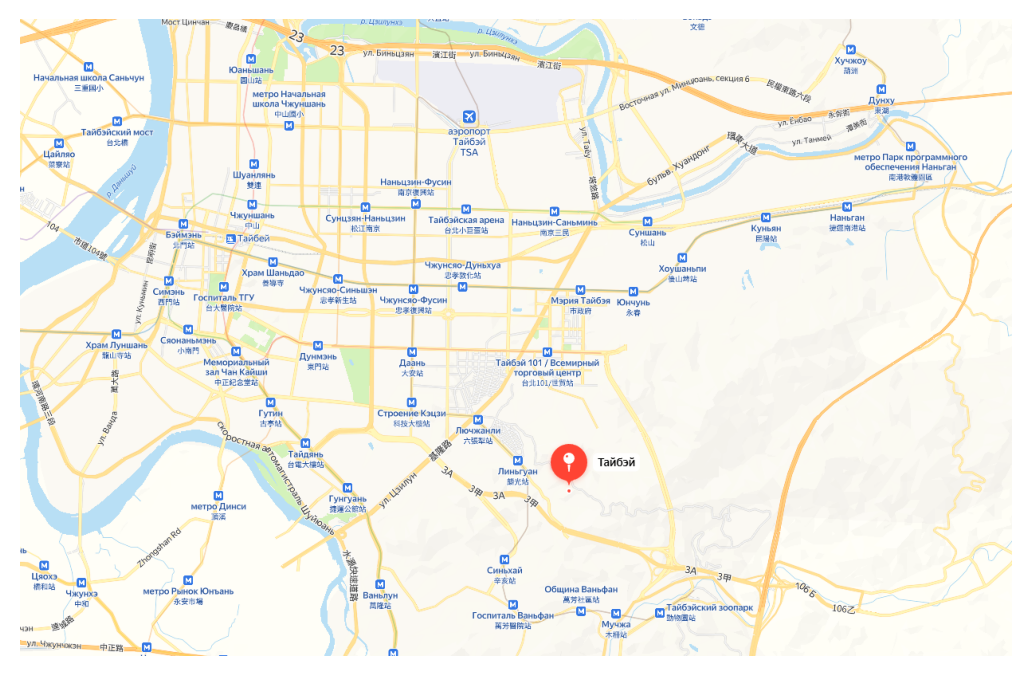

In [149]:
image_path = 'C:\\Users\\Acer\\Documents\\Lightshot\\Screenshot_89.png'
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [150]:
import pandas as pd

def FutureEngeneeringGeneration(df_gen, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude):
    df_gen = df_gen.copy()

    df_gen['X1 transaction date'] = df_gen['X1 transaction date'] - start_date
    df_gen['X5 latitude'] = df_gen['X5 latitude'] - start_latitude
    df_gen['X6 longitude'] = df_gen['X6 longitude'] - start_longitude

    df_gen['Month'] = df_gen['X1 transaction date'].apply(lambda x: ((int((x - int(x)) * 12) + 1))) # Extract month (1 to 12)
    # Add a 'Season' column based on the month
    def get_season(month):
        if month in [12, 1, 2]:
            return 1
        elif month in [3, 4, 5]:
            return 2
        elif month in [6, 7, 8]:
            return 3
        elif month in [9, 10, 11]:
            return 4

    df_gen['Season'] = df_gen['Month'].apply(get_season)

    return df_gen

start_latitude = 24.93207
start_longitude = 121.47353
start_date = 2012.585

end_latitude = 25.01459
end_longitude = 121.56627
end_date = 2013.584


In [151]:
df_train_0 = df_train_0.dropna()

In [152]:
df_train_1 = FutureEngeneeringGeneration(df_train_0, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude)
df_test_1 = FutureEngeneeringGeneration(df_test_0, start_date, start_latitude, start_longitude, end_date, end_latitude, end_longitude)


In [153]:
df_train_2 = df_train_1.drop(columns=['index', 'X6 longitude', 'Season'])
df_test_2 = df_test_1.drop(columns=['index', 'X6 longitude', 'Season'])

In [154]:
df_test_2

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Month
0,0.248,3.4,NaN,NaN,0.02537,3
1,0.498,34.8,405.21340,1.0,0.04142,6
2,0.915,4.1,2147.37600,3.0,0.03092,11
3,0.332,18.9,1009.23500,0.0,0.03150,4
4,0.832,3.9,2147.37600,3.0,0.03092,10
...,...,...,...,...,...,...
78,0.582,21.3,537.79710,4.0,0.04218,7
79,0.332,9.9,279.17260,NaN,0.04321,4
80,0.832,10.5,279.17260,7.0,0.04321,10
81,0.665,17.8,NaN,3.0,0.03524,8


In [155]:
df_train_3 = df_train_2.copy()
df_test_3 = df_test_2.copy()
df_train_3['X3 distance to the nearest MRT station'] = np.log(df_train_3['X3 distance to the nearest MRT station'])
df_test_3['X3 distance to the nearest MRT station'] = np.log(df_test_3['X3 distance to the nearest MRT station'])

In [156]:

X = df_train_3.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_train_3['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (242, 6)
Test set size: (61, 6)
Model score is: 0.7891586913341407
Mean Squared Error (MSE) is: 35.481099569542806


### Реализуем KDE

## Ядерная оценка плотности (KDE)

Пусть у нас есть выборка из $n$ точек:

$$
X = \{x_1, x_2, ..., x_n\}
$$

Мы хотим оценить плотность вероятности $f(x)$ в точке $x$.

---

### Формула оценки плотности:

$$
\hat{f}_h(x) = \frac{1}{n} \sum_{i=1}^n K_h(x - x_i) = \frac{1}{n h} \sum_{i=1}^n K\left(\frac{x - x_i}{h}\right)
$$

* $K(\cdot)$ — ядро (kernel), функция, обычно симметричная и неотрицательная, удовлетворяющая свойствам плотности.
* $h > 0$ — **ширина окна (bandwidth)** — параметр сглаживания.

---

### Часто используемые ядра

* **Гауссовское ядро:**

$$
K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}
$$

* **Прямоугольное ядро (uniform):**

$$
K(u) = \frac{1}{2} \mathbf{1}_{|u| \le 1}
$$

* **Эпанеchnikov kernel:**

$$
K(u) = \frac{3}{4} (1 - u^2) \mathbf{1}_{|u| \le 1}
$$

---

### В многомерном случае

Для $d$-мерных данных $\mathbf{x}, \mathbf{x}_i \in \mathbb{R}^d$:

$$
\hat{f}_h(\mathbf{x}) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h^d} K\left(\frac{\mathbf{x} - \mathbf{x}_i}{h}\right)
$$

Где $K$ — многомерное ядро, например, многомерное гауссовское:

$$
K(\mathbf{u}) = \frac{1}{(2\pi)^{d/2}} e^{-\frac{1}{2} \mathbf{u}^T \mathbf{u}}
$$


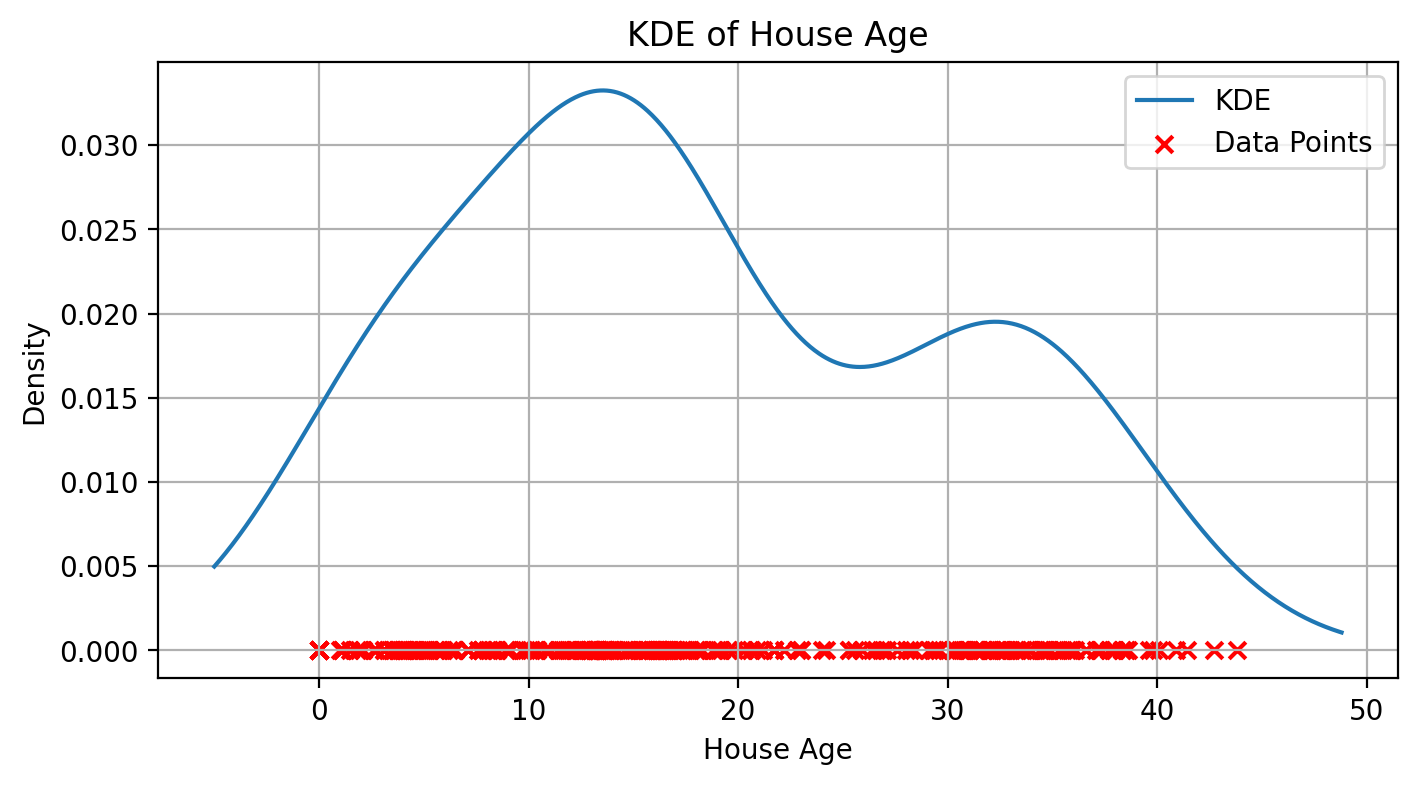

In [157]:
from sklearn.neighbors import KernelDensity

X = df_train_3[['X2 house age']].values 
kde = KernelDensity(kernel='gaussian', bandwidth=5.0)
kde.fit(X)

X_plot = np.linspace(X.min() - 5, X.max() + 5, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
density = np.exp(log_dens)

plt.figure(figsize=(8, 4))
plt.plot(X_plot[:, 0], density, label='KDE')
plt.scatter(X[:, 0], np.zeros_like(X), marker='x', color='red', label='Data Points')
plt.title('KDE of House Age')
plt.xlabel('House Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
# Гауссово ядро
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

def kde_estimate(x_points, data, bandwidth):
    n = len(data)
    densities = np.zeros_like(x_points)
    for i, x in enumerate(x_points):
        kernel_values = gaussian_kernel((x - data) / bandwidth)
        densities[i] = np.sum(kernel_values) / (n * bandwidth)
    return densities

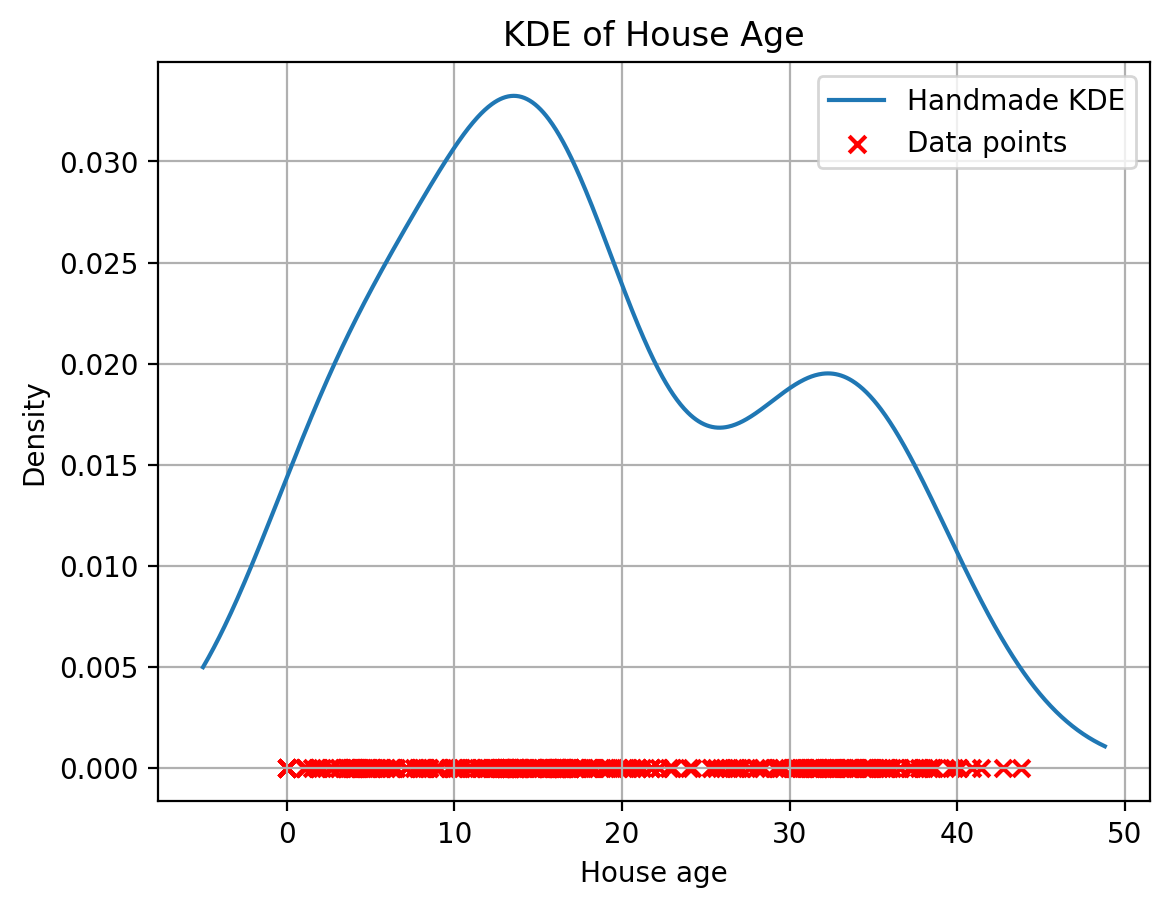

In [159]:
x_range = np.linspace(X.min() - 5, X.max() + 5, 1000)[:, np.newaxis]

density = kde_estimate(x_range, X, bandwidth=5.0)


plt.plot(x_range, density, label='Handmade KDE')
plt.scatter(X, np.zeros_like(X), marker='x', color='red', label='Data points')
plt.title('KDE of House Age')
plt.xlabel('House age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### AdaBoost

## Обозначения

* $(x_i, y_i)$, $i=1,...,n$ — обучающая выборка, где $y_i \in \{-1, +1\}$
* $T$ — число итераций (количество слабых моделей)
* $h_t(x)$ — базовый классификатор на $t$-й итерации, выдающий $\pm 1$
* $\alpha_t$ — вес классификатора $h_t$
* $w_i^{(t)}$ — вес для примера $i$ на итерации $t$

---

## Инициализация весов

$$
w_i^{(1)} = \frac{1}{n}, \quad i=1,...,n
$$

---

## Итерации $t=1,...,T$:

1. Обучаем слабый классификатор $h_t$ с учётом весов $w_i^{(t)}$.
2. Вычисляем ошибку классификатора:

$$
\epsilon_t = \frac{\sum_{i=1}^n w_i^{(t)} \cdot \mathbf{1}(h_t(x_i) \neq y_i)}{\sum_{i=1}^n w_i^{(t)}}
$$

где $\mathbf{1}(\cdot)$ — индикатор ошибки.

3. Вычисляем вес классификатора:

$$
\alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)
$$

4. Обновляем веса обучающих примеров:

$$
w_i^{(t+1)} = w_i^{(t)} \cdot \exp(-\alpha_t y_i h_t(x_i))
$$

5. Нормируем веса так, чтобы сумма была 1:

$$
w_i^{(t+1)} \leftarrow \frac{w_i^{(t+1)}}{\sum_{j=1}^n w_j^{(t+1)}}
$$

---

## Итоговое предсказание для нового объекта $x$:

$$
H(x) = \text{sign}\left( \sum_{t=1}^T \alpha_t h_t(x) \right)
$$


In [160]:
from sklearn.ensemble import AdaBoostRegressor

X = df_train_3.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_train_3['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (242, 6)
Test set size: (61, 6)
Model score is: 0.7111798193727624
Mean Squared Error (MSE) is: 48.603651966364986


### Если DecisionTreeRegressor из sklearn

In [161]:
def adaboost_regressor(X_train, y_train, X_test, y_test=None,
                       n_estimators=50, learning_rate=1.0, max_depth=1, random_state=None):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    
    n_train = len(y_train)
    F_train = np.zeros(n_train)
    
    models = []
    model_weights = []
    
    rng = np.random.RandomState(random_state)
    
    for i in range(n_estimators):
        residuals = y_train - F_train
        tree_random_state = rng.randint(0, 1_000_000)
        model = DecisionTreeRegressor(max_depth=max_depth, random_state=tree_random_state)
        model.fit(X_train, residuals)
        
        pred_train = model.predict(X_train)
        F_train += learning_rate * pred_train
        
        models.append(model)
        model_weights.append(learning_rate)
    
    def predict(X):
        X = np.array(X)
        pred = np.zeros(len(X))
        for model, weight in zip(models, model_weights):
            pred += weight * model.predict(X)
        return pred
    
    y_pred = predict(X_test)
    
    r2 = None
    if y_test is not None:
        y_test = np.array(y_test)
        ss_res = np.sum((y_test - y_pred) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        r2 = 1 - ss_res / ss_tot
    
    return y_pred, r2


y_pred, r2 = adaboost_regressor(
    x_train, y_train, x_test, y_test,
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

mse = mean_squared_error(y_test, y_pred)
print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")
print(f"Model score is: {r2}")
print(f"Mean Squared Error (MSE) is: {mse}")


Training set size: (242, 6)
Test set size: (61, 6)
Model score is: 0.7808548538125876
Mean Squared Error (MSE) is: 36.87849786770298


### Если писать самому DecisionTreeRegressor (Писала понятное дело нейронка, я попровлял)

In [162]:
class HandmadeDecisionTreeRegressor:
    def __init__(self, max_depth=1, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.is_leaf = False
        self.value = None
        self.n_features = None
        self.n_samples = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.n_samples, self.n_features = X.shape
        self._build_tree(X, y, depth=0)
    
    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split or len(np.unique(y)) == 1:
            self.is_leaf = True
            self.value = np.mean(y)
            return
        
        best_mse = float('inf')
        best_feat = None
        best_thresh = None
        best_left_idx = None
        best_right_idx = None
        
        for feature in range(self.n_features):
            thresholds = np.unique(X[:, feature])
            for thresh in thresholds:
                left_idx = X[:, feature] <= thresh
                right_idx = X[:, feature] > thresh
                
                if sum(left_idx) == 0 or sum(right_idx) == 0:
                    continue
                
                left_mean = np.mean(y[left_idx])
                right_mean = np.mean(y[right_idx])
                
                mse_left = np.mean((y[left_idx] - left_mean) ** 2)
                mse_right = np.mean((y[right_idx] - right_mean) ** 2)
                
                mse_total = (sum(left_idx) * mse_left + sum(right_idx) * mse_right) / len(y)
                
                if mse_total < best_mse:
                    best_mse = mse_total
                    best_feat = feature
                    best_thresh = thresh
                    best_left_idx = left_idx
                    best_right_idx = right_idx
        
        if best_feat is None:
            self.is_leaf = True
            self.value = np.mean(y)
            return
        
        self.feature_index = best_feat
        self.threshold = best_thresh
        
        self.left = HandmadeDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        self.left.n_features = self.n_features
        self.left.n_samples = sum(best_left_idx)
        self.left._build_tree(X[best_left_idx], y[best_left_idx], depth + 1)
        
        self.right = HandmadeDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        self.right.n_features = self.n_features
        self.right.n_samples = sum(best_right_idx)
        self.right._build_tree(X[best_right_idx], y[best_right_idx], depth + 1)

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_one(x) for x in X])

    def _predict_one(self, x):
        if self.is_leaf:
            return self.value
        if x[self.feature_index] <= self.threshold:
            return self.left._predict_one(x)
        else:
            return self.right._predict_one(x)


In [163]:
def adaboost_regressor(X_train, y_train, X_test, y_test=None,
                                  n_estimators=50, learning_rate=1.0, max_depth=1):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    
    n_train = len(y_train)
    F_train = np.zeros(n_train)
    
    models = []
    model_weights = []
    
    for _ in range(n_estimators):
        residuals = y_train - F_train
        model = HandmadeDecisionTreeRegressor(max_depth=max_depth)
        model.fit(X_train, residuals)
        
        pred_train = model.predict(X_train)
        F_train += learning_rate * pred_train
        
        models.append(model)
        model_weights.append(learning_rate)
    
    def predict(X):
        X = np.array(X)
        pred = np.zeros(len(X))
        for model, weight in zip(models, model_weights):
            pred += weight * model.predict(X)
        return pred
    
    y_pred = predict(X_test)
    
    r2 = None
    if y_test is not None:
        y_test = np.array(y_test)
        ss_res = np.sum((y_test - y_pred) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        r2 = 1 - ss_res / ss_tot
    
    return y_pred, r2
y_pred, r2 = adaboost_regressor(
    x_train, y_train, x_test, y_test,
    n_estimators=50, learning_rate=0.1, max_depth=3
)

mse = mean_squared_error(y_test, y_pred)
print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")
print(f"Model score is: {r2}")
print(f"Mean Squared Error (MSE) is: {mse}")


Training set size: (242, 6)
Test set size: (61, 6)
Model score is: 0.5896681510333532
Mean Squared Error (MSE) is: 69.05205285370953


### Gradient Boosting

## Основная идея

Градиентный бустинг — это итеративный способ построения ансамбля моделей (обычно решающих деревьев), где на каждом шаге добавляется модель, обученная на **ошибках предыдущих моделей**.

## Обозначения

* $y_i$ — истинные значения (таргеты)
* $\hat{y}_i^{(m)}$ — предсказание модели после $m$-го шага (итерации)
* $f_m(x)$ — модель, добавляемая на $m$-м шаге (например, дерево)
* $L(y, \hat{y})$ — функция потерь (например, MSE)
* $\eta$ — learning rate (скорость обучения)

## Формулы

1. Инициализируем предсказание, например, константой (например, средним):

$$
\hat{y}_i^{(0)} = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma)
$$

2. Для каждого шага $m = 1, \dots, M$:

* Вычисляем **остатки** (градиенты отрицательного направления функции потерь):

$$
r_i^{(m)} = - \left[ \frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} \right]_{\hat{y} = \hat{y}_i^{(m-1)}}
$$

* Обучаем базовую модель $f_m(x)$, чтобы аппроксимировать $r_i^{(m)}$:

$$
f_m = \arg\min_f \sum_{i=1}^n \left( r_i^{(m)} - f(x_i) \right)^2
$$

* Обновляем предсказание:

$$
\hat{y}_i^{(m)} = \hat{y}_i^{(m-1)} + \eta \cdot f_m(x_i)
$$

---

## Кратко:

$$
\boxed{
\begin{cases}
r_i^{(m)} = - \left[ \frac{\partial L(y_i, \hat{y}_i)}{\partial \hat{y}_i} \right]_{\hat{y} = \hat{y}_i^{(m-1)}} \\
\hat{y}_i^{(m)} = \hat{y}_i^{(m-1)} + \eta \cdot f_m(x_i)
\end{cases}
}
$$

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

X = df_train_3.drop(columns=['Y house price of unit area'])  # Drop target from features
y = df_train_3['Y house price of unit area']  # Target variable

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")

model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)  # Get model predictions
mse = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Model score is: {model.score(x_test, y_test)}")  # R² score
print(f"Mean Squared Error (MSE) is: {mse}")  # MSE

Training set size: (242, 6)
Test set size: (61, 6)
Model score is: 0.7818069218672052
Mean Squared Error (MSE) is: 36.71828058553649


In [165]:
def fit_stump(X, y):
    m, n = X.shape
    best_error = float('inf')
    best_stump = None

    for feature in range(n):
        thresholds = np.unique(X[:, feature])
        for thresh in thresholds:
            left_mask = X[:, feature] <= thresh
            right_mask = X[:, feature] > thresh
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            left_mean = np.mean(y[left_mask])
            right_mean = np.mean(y[right_mask])

            pred = np.where(left_mask, left_mean, right_mean)
            error = np.mean((y - pred) ** 2)

            if error < best_error:
                best_error = error
                best_stump = {
                    'feature': feature,
                    'threshold': thresh,
                    'left_val': left_mean,
                    'right_val': right_mean
                }
    return best_stump

def predict_stump(stump, X):
    mask = X[:, stump['feature']] <= stump['threshold']
    return np.where(mask, stump['left_val'], stump['right_val'])

def gradient_boosting(X_train, y_train, X_test, n_estimators=100, learning_rate=0.1):
    y_pred_train = np.full_like(y_train, np.mean(y_train), dtype=float)
    y_pred_test = np.full(X_test.shape[0], np.mean(y_train), dtype=float)

    models = []

    for _ in range(n_estimators):
        residuals = y_train - y_pred_train
        stump = fit_stump(X_train, residuals)
        update_train = predict_stump(stump, X_train)
        update_test = predict_stump(stump, X_test)

        y_pred_train += learning_rate * update_train
        y_pred_test += learning_rate * update_test

        models.append(stump)

    return y_pred_test

y_pred = gradient_boosting(x_train.values, y_train.values, x_test.values, n_estimators=100, learning_rate=0.1)
print(f"Training set size: {x_train.shape}")
print(f"Test set size: {x_test.shape}")
print("Model score is:", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE) is:", mean_squared_error(y_test, y_pred))

Training set size: (242, 6)
Test set size: (61, 6)
Model score is: 0.7767176076688295
Mean Squared Error (MSE) is: 37.574727858397196


### Radial basis kernel regression

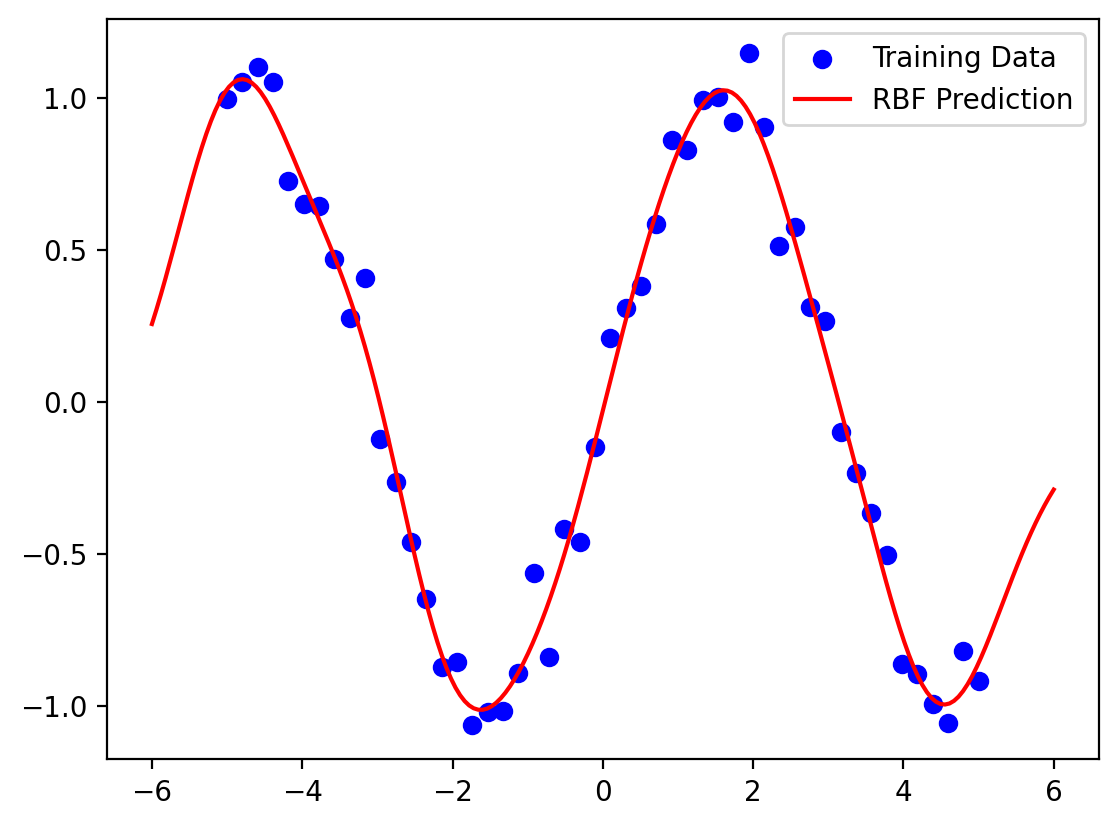

In [166]:
from sklearn.metrics.pairwise import rbf_kernel

def rbf_kernel_regression(X_train, y_train, X_test, gamma=0.5, lam=1e-3):
    # Compute kernel matrix
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    
    # Solve for alpha
    alpha = np.linalg.solve(K + lam * np.eye(len(K)), y_train)
    
    # Compute test kernel and make predictions
    K_test = rbf_kernel(X_test, X_train, gamma=gamma)
    y_pred = K_test.dot(alpha)
    
    return y_pred

X = np.linspace(-5, 5, 50).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(50)
X_test = np.linspace(-6, 6, 200).reshape(-1, 1)

y_pred = rbf_kernel_regression(X, y, X_test, gamma=0.5, lam=1e-2)

plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_test, y_pred, color='red', label='RBF Prediction')
plt.legend()
plt.show()


The **Radial Basis Function (RBF) kernel**, also known as the **Gaussian kernel**, is defined as:

$$
K(x, x') = \exp\left(-\gamma \, \|x - x'\|^2\right)
$$

or equivalently, using the Gaussian width $\sigma$:

$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

$$
\gamma = \frac{1}{2\sigma^2}
$$


* $x, x' \in \mathbb{R}^d$: input feature vectors
* $\|x - x'\|^2$: squared Euclidean distance
* The closer $x$ is to $x'$, the closer $K(x, x')$ is to 1
* As the distance increases, the kernel value falls off **exponentially**

In [167]:
def rbf_kernel(X1, X2, gamma=1.0):
    X1_sq = np.sum(X1**2, axis=1).reshape(-1, 1)
    X2_sq = np.sum(X2**2, axis=1).reshape(1, -1)
    dist_sq = X1_sq + X2_sq - 2 * np.dot(X1, X2.T) 

    return np.exp(-gamma * dist_sq)

def rbf_kernel_regression(X_train, y_train, X_test, gamma=0.5, lam=1e-3):
    # Compute kernel matrix
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    
    # Solve for alpha
    alpha = np.linalg.solve(K + lam * np.eye(len(K)), y_train)
    
    # Compute test kernel and make predictions
    K_test = rbf_kernel(X_test, X_train, gamma=gamma)
    y_pred = K_test.dot(alpha)
    
    return y_pred

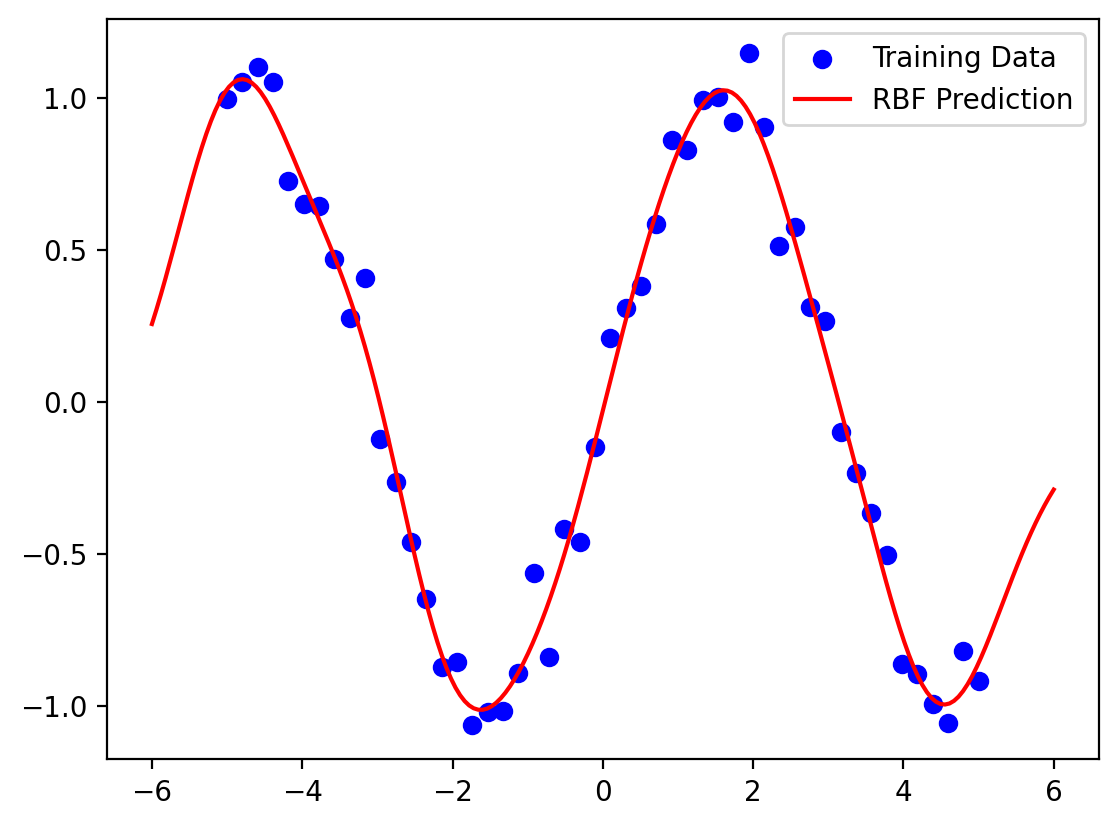

In [168]:
# Fit and predict
y_pred = rbf_kernel_regression(X, y, X_test, gamma=0.5, lam=1e-2)

# Plot
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_test, y_pred, color='red', label='RBF Prediction')
plt.legend()
plt.show()


### STL
https://wessa.net/download/stl.pdf

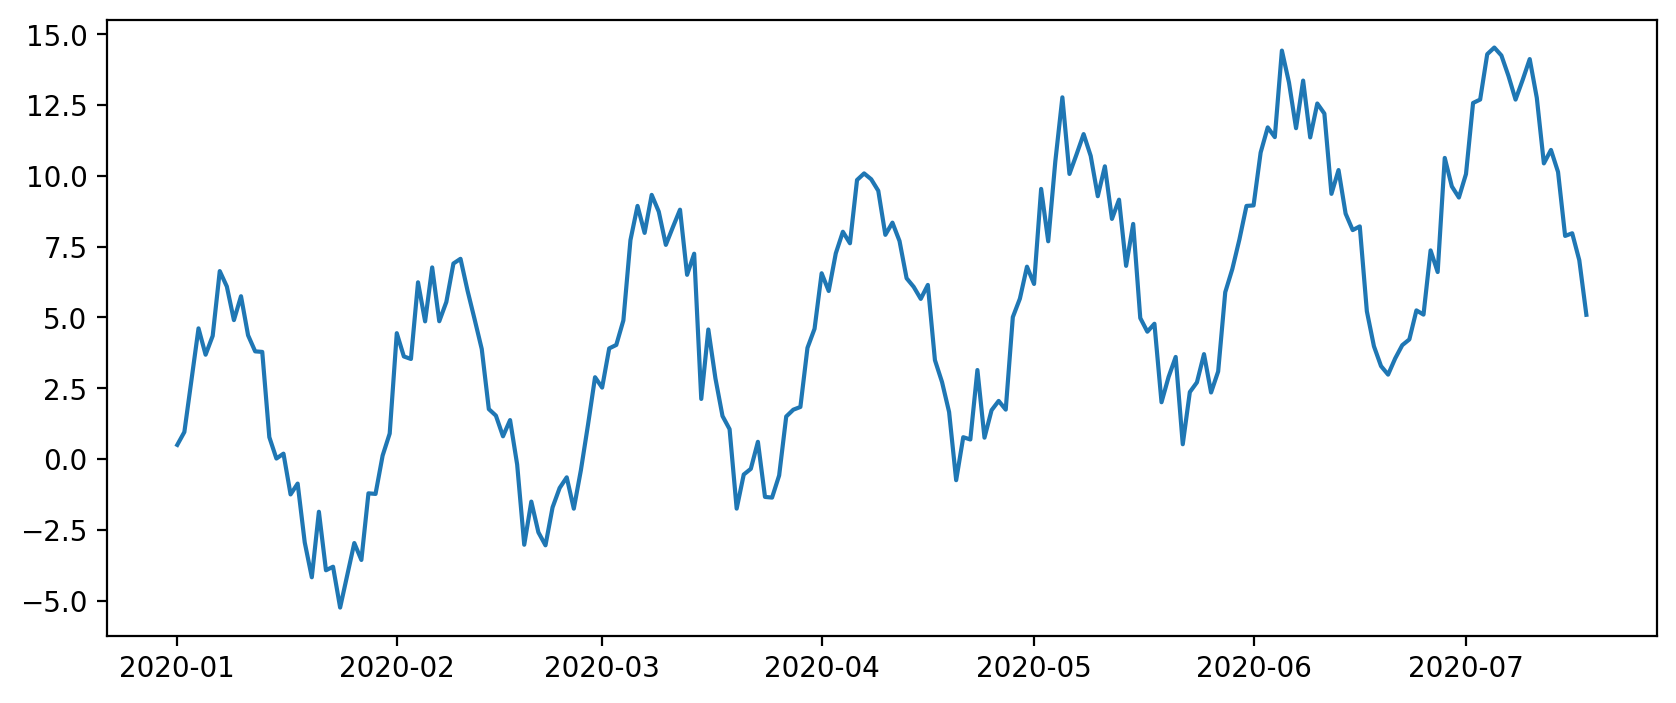

In [169]:
np.random.seed(42)
n = 200
t = pd.date_range(start='2020-01-01', periods=n, freq='D')
y = 0.05 * np.arange(n) + 5 * np.sin(2 * np.pi * np.arange(n) / 30) + np.random.normal(scale=1.0, size=n)
y_series = pd.Series(y, index=t)

plt.figure(figsize=(10, 4))
plt.plot(y_series, label='y_series')
plt.show()

### Изначально хотел сделать реализацию через Loess но, так не получится сравнить с реализацией statsmodels stl, поэтому Lowess
#### Lowess более простая релизация Loess, Lowess - линейный, Loess - Полиномилаьный (2 степени обычно).  

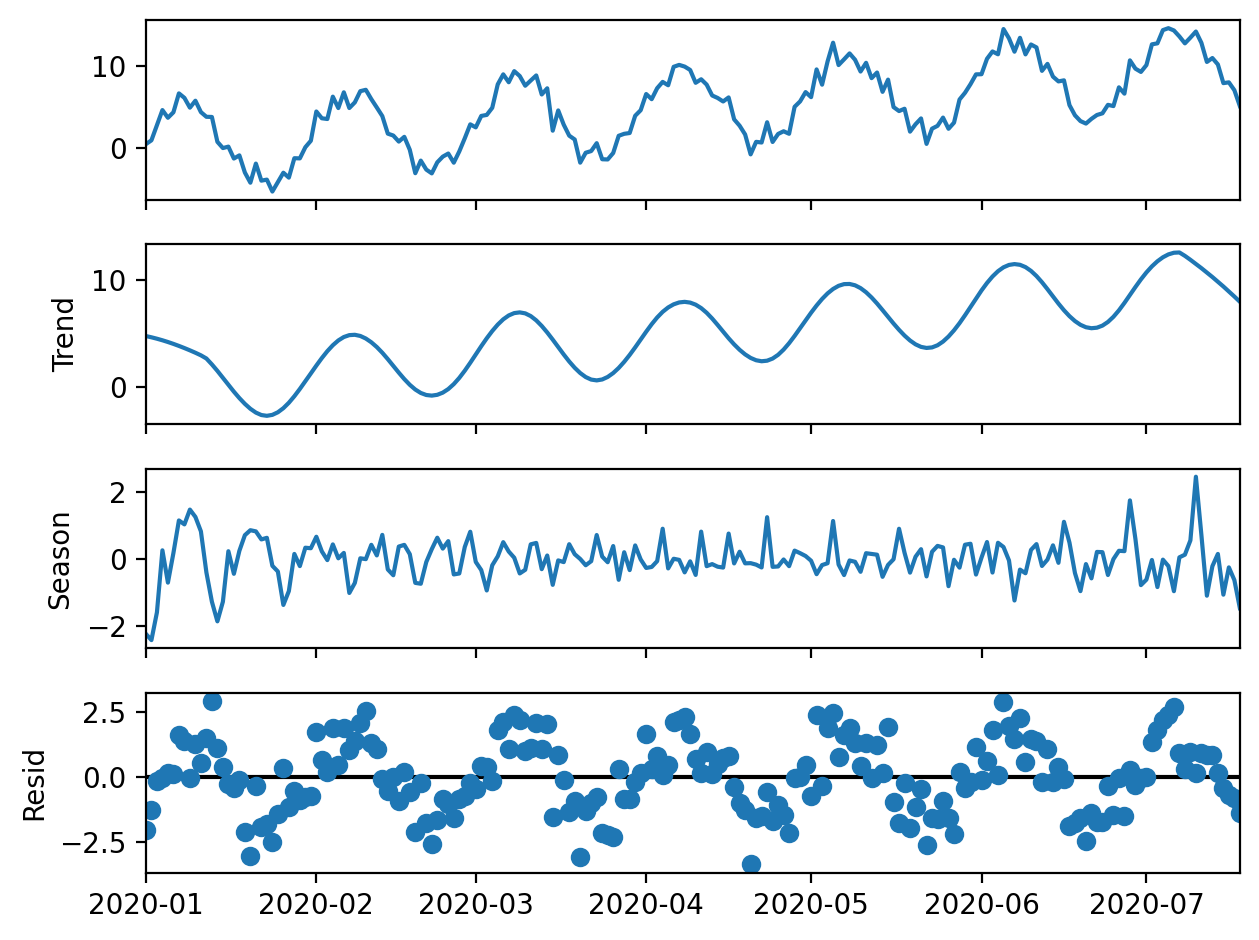

In [170]:
from statsmodels.tsa.seasonal import STL

stl = STL(y_series, period=12)
res = stl.fit()
res.plot()
plt.show()

STL (Seasonal-Trend decomposition using Loess) — это метод **разложения временного ряда** на три компоненты:

1. **Trend (тренд)** — долгосрочное изменение уровня ряда
2. **Seasonal (сезонность)** — периодические колебания
3. **Remainder (остаток / шум)** — всё, что не объясняется трендом и сезонностью

* **STL устойчив к выбросам** (если включить робастную итерацию).
* **Гибкий:** работает с любой длиной периода (в отличие от classical decomposition).
* Основан на **LOWESS**, что делает его нелинейным и очень точным для сложных данных.
* Подходит как для **регулярных**, так и **нерегулярных** временных рядов (в отличие от многих других методов).



### Шаги алгоритма LOWESS:

1. **Для каждой точки $x_0$ из данных:**

   * Определяется локальное окно соседних точек $x_i$, размер которого зависит от параметра `frac` (доля всех точек).
2. **Вычисляются веса для точек в окне:**

   * Вес зависит от расстояния между $x_i$ и $x_0$.
   * Используется **трикубическая функция веса** (tricube kernel):

     $$
     w_i = \begin{cases}
     (1 - |d_i|^3)^3 & \text{если } |d_i| < 1 \\
     0 & \text{иначе}
     \end{cases}
     $$

     где $d_i = \frac{|x_i - x_0|}{\text{bandwidth}}$ — нормированное расстояние.
3. **Локальная регрессия:**

   * Строится взвешенная линейная регрессия (обычно линейная или полиномиальная) на соседних точках с весами $w_i$.
   * Минимизируется взвешенная сумма квадратов ошибок:

     $$
     \min_\beta \sum_i w_i (y_i - \beta_0 - \beta_1 x_i)^2
     $$
4. **Предсказание:**

   * Значение сглаженного ряда в точке $x_0$ — это предсказание локальной регрессии при $x_0$:

     $$
     \hat{y}_0 = \beta_0 + \beta_1 x_0
     $$
5. **Повтор:**

   * Шаги 1–4 повторяются для каждой точки $x_0$ из выборки.

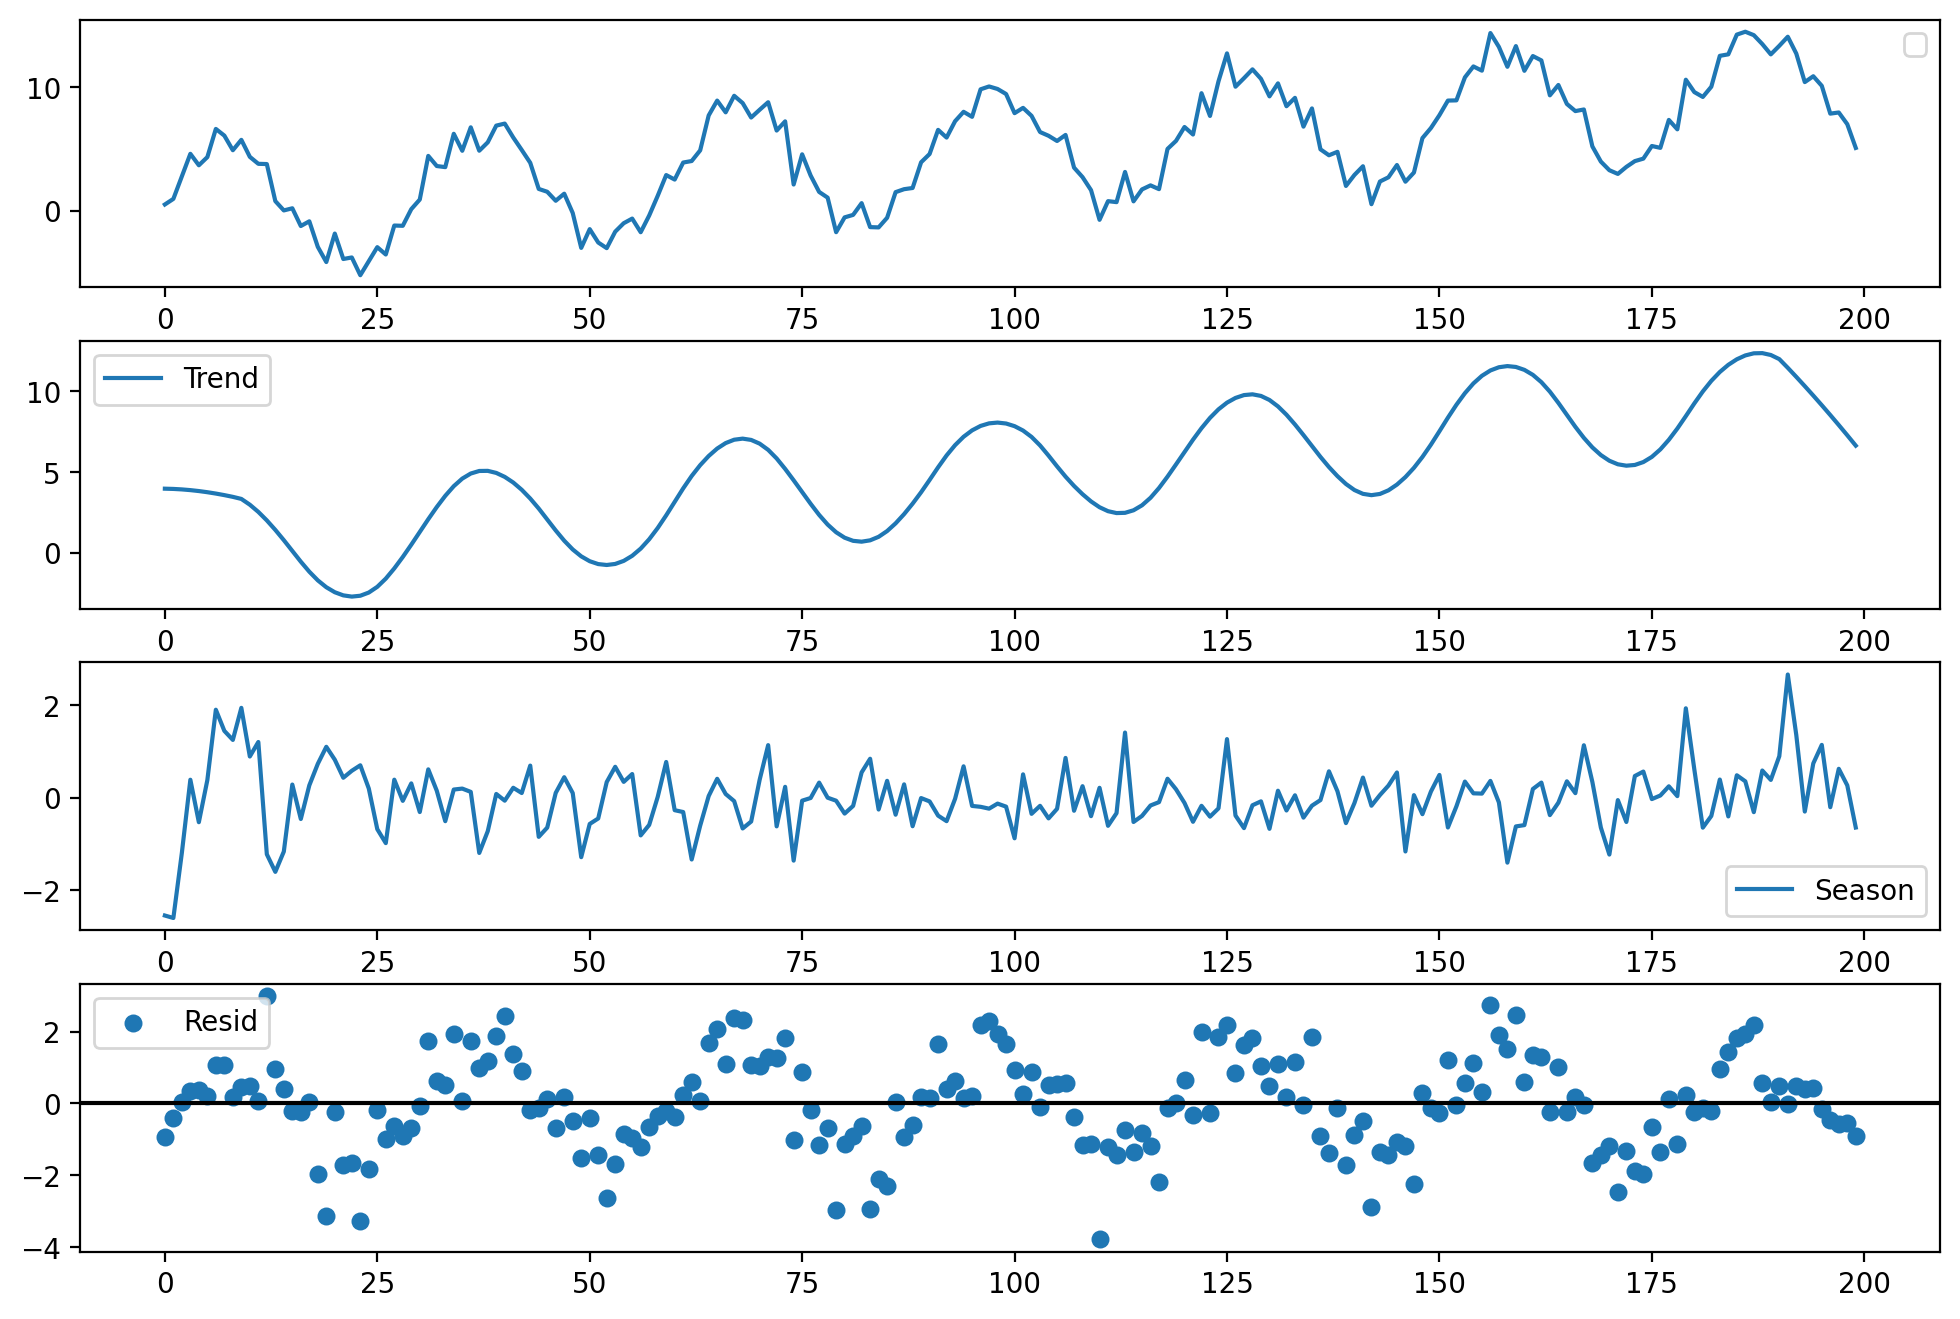

In [171]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# y_series = trend + seasonal + resid

def stl_decompose(y, period, trend_frac=0.1,seasonal_frac=0.3, robust=True, n_iter=2):
    n = len(y)
    t = np.arange(n)
    y = np.asarray(y)
    
    trend = np.zeros(n)
    seasonal = np.zeros(n)
    resid = np.zeros(n)
    weights = np.ones(n)
    
    for iteration in range(n_iter):
        # Trend
        y_deseasonal = y - seasonal
        trend = lowess(y_deseasonal, t, frac=trend_frac)[:, 1]
        
        # Season
        seasonal = np.zeros(n)
        y_detrended = y - trend
        for i in range(period):
            idx = np.arange(i, n, period)
            if len(idx) > 0:
                # Выделяем подряд сезонных значений
                y_sub = y_detrended[idx]
                t_sub = idx
                
                # Сглаживаем подряд локально (lowess с маленьким frac)
                smooth_sub = lowess(y_sub, t_sub, frac=seasonal_frac)[:, 1]
                
                # Записываем сглаженную сезонность обратно
                seasonal[idx] = smooth_sub

        seasonal -= np.mean(seasonal)  # Центрируем сезонность
        
        # Resid
        resid = y - trend - seasonal
        
        # Weight update for robust increse
        if robust:
            mad = np.median(np.abs(resid - np.median(resid)))
            if mad == 0:
                mad = np.mean(np.abs(resid - np.mean(resid))) + 1e-6
            weights = (1 - (resid / (6 * mad)) ** 2) ** 2
            weights[np.abs(resid) > 6 * mad] = 0
        else:
            weights = np.ones(n)
            
    #Graph        
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(t, y_series)
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(t, trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(t, seasonal, label='Season')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.scatter(t, resid, label='Resid', s=30)
    plt.axhline(0, color='black', linestyle='-')
    plt.legend()

    
    return plt

res = stl_decompose(y_series.values, period=12)
res.show()